# Preliminary Data Exploration

### Retreive California Housing Dataset from Kaggle
https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Uncomment and run to set up environment

In [95]:
# !conda env create -f ../environment.yml
# !conda env update -f ../environment.yml

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
data = pd.read_csv('../data/housing.csv')
data = data.drop('ocean_proximity', axis=1)

In [99]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## First we look at each variable in isolation

In [100]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Here are the plots of the densities of each variable. Notice that none of them are perfectly normally distributed.

<Axes: ylabel='Density'>

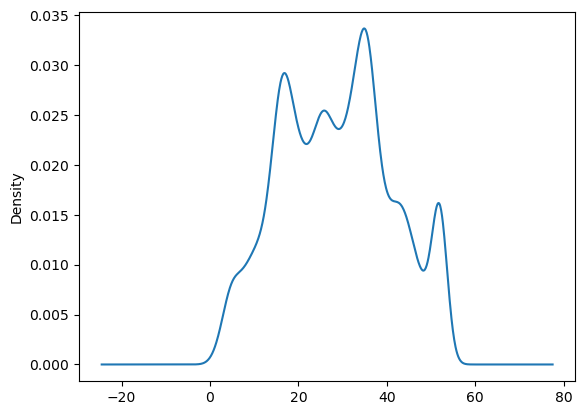

In [101]:
plt.figure()
data['housing_median_age'].plot(kind='density')

<Axes: ylabel='Density'>

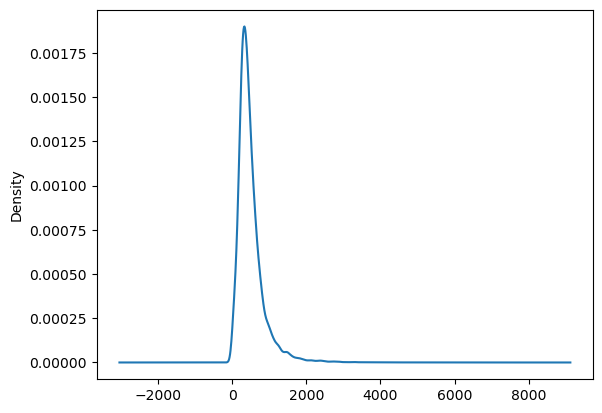

In [102]:
plt.figure()
data['households'].plot(kind='density')

<Axes: ylabel='Density'>

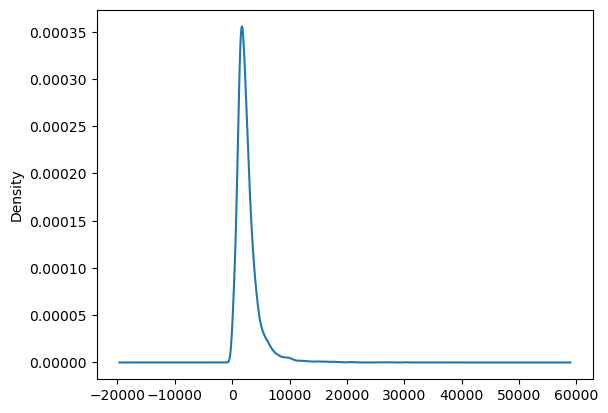

In [103]:
plt.figure()
data['total_rooms'].plot(kind='density')

<Axes: ylabel='Density'>

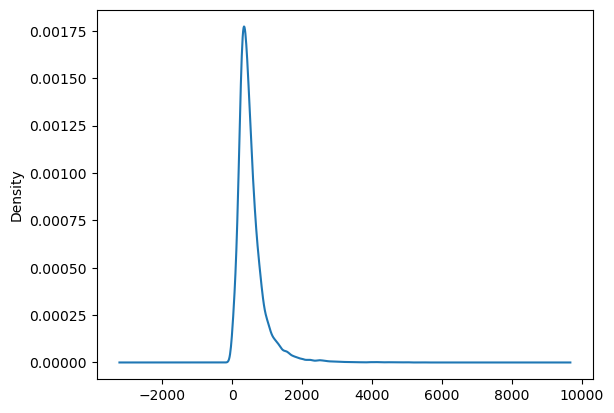

In [104]:
plt.figure()
data['total_bedrooms'].plot(kind='density')

<Axes: ylabel='Density'>

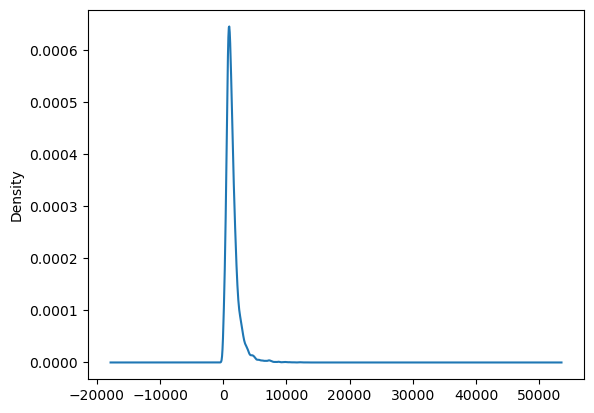

In [105]:
plt.figure()
data['population'].plot(kind='density')

<Axes: ylabel='Density'>

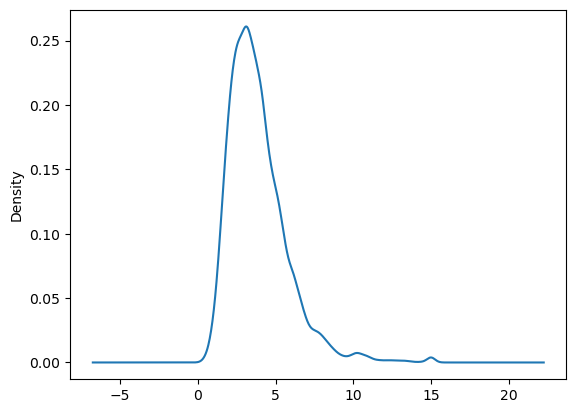

In [106]:
plt.figure()
data['median_income'].plot(kind='density')

<Axes: ylabel='Density'>

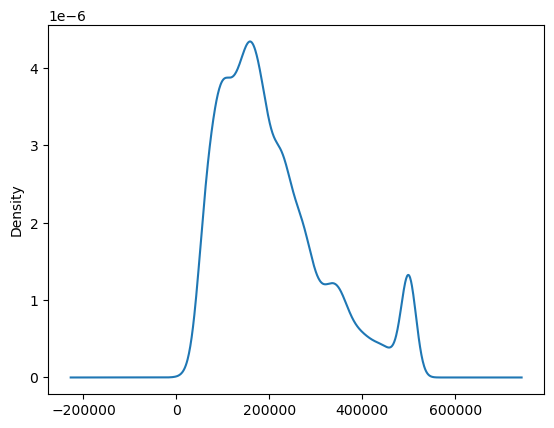

In [107]:
plt.figure()
data['median_house_value'].plot(kind='density')

### The density plot of median_house_value raises a question: what accounts for the second peak around 500,000?

## Now, we compare variables

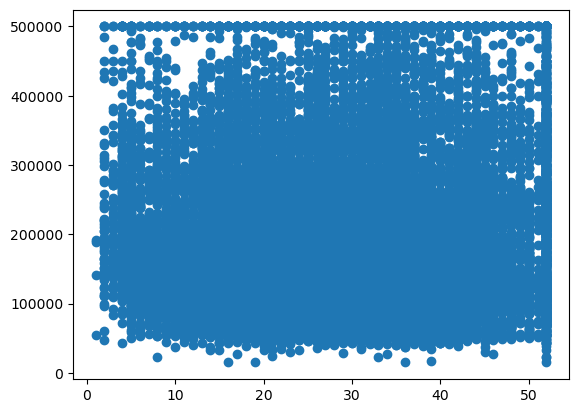

In [108]:
plt.figure()
plt.scatter(data['housing_median_age'], data['median_house_value'])

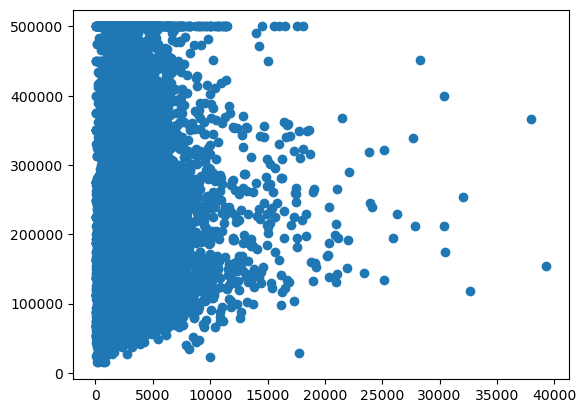

In [109]:
plt.figure()
plt.scatter(data['total_rooms'], data['median_house_value'])

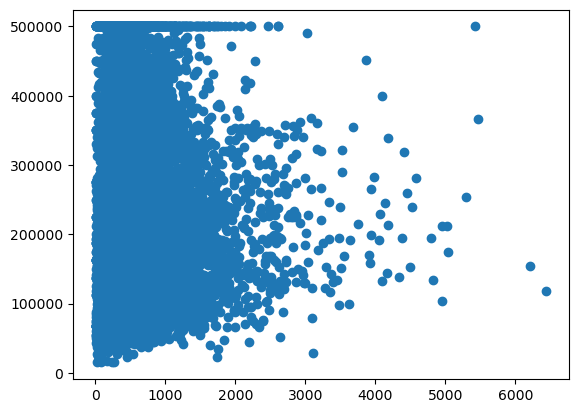

In [110]:
plt.figure()
plt.scatter(data['total_bedrooms'], data['median_house_value'])

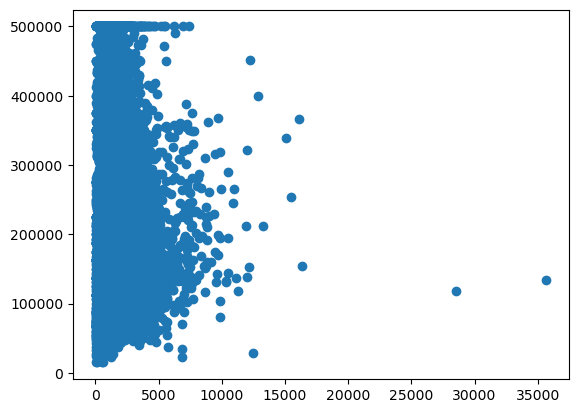

In [111]:
plt.figure()
plt.scatter(data['population'], data['median_house_value'])

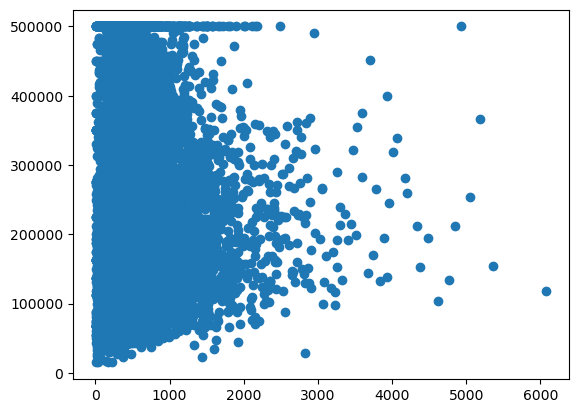

In [112]:
plt.figure()
plt.scatter(data['households'], data['median_house_value'])

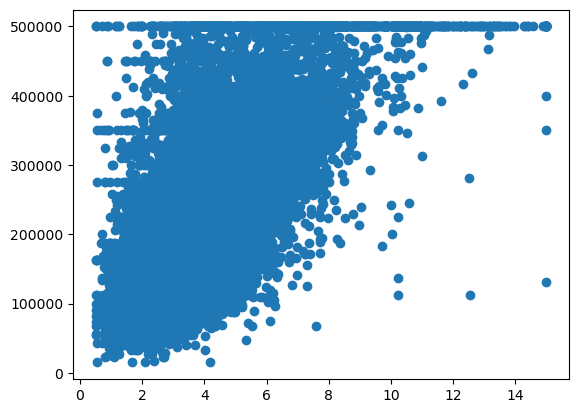

In [113]:
plt.figure()
plt.scatter(data['median_income'], data['median_house_value'])

### From these plots, notice how the media_home_price of 500,000 seems to be fairly evenly distributed across the other variables. This may interfere with detecting larger scale patterns.

### The correlation matrix tells us that the four variables, total_rooms, total_bedrooms, population, and households, are redundant.

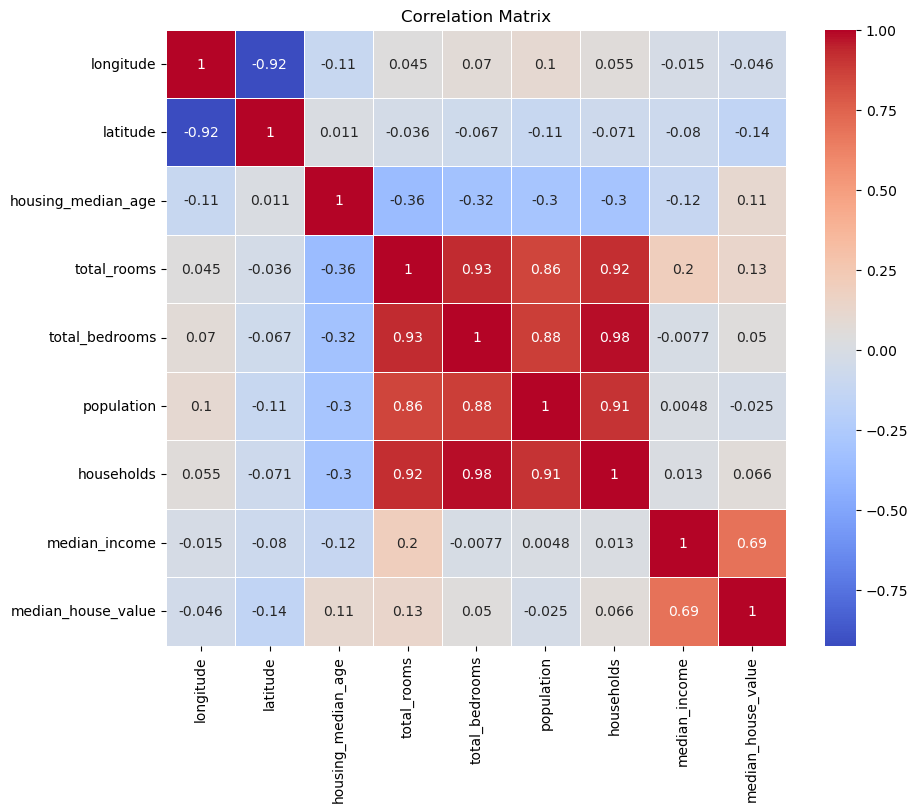

In [115]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### In terms of a graph, the high correlation looks like this

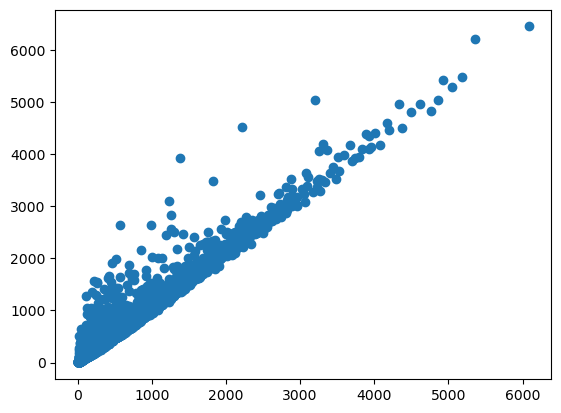

In [116]:
plt.figure()
plt.scatter(data['households'],data['total_bedrooms'])

## We can break up the data into house value brackets 

In [ ]:
low_price = data[(data['median_house_value'] >= 100000) & (data['median_house_value'] <= 200000)]
mid_price= data[(data['median_house_value'] >= 200000) & (data['median_house_value'] <= 300000)]
high_price = data[(data['median_house_value'] >= 300000) & (data['median_house_value'] <= 400000)]
crazy_price = data[(data['median_house_value'] >= 400000) & (data['median_house_value'] <= 500000)]

### The following shows that mean housing_median_age increases with median_house_value. Also most of our data is concentrated in the lower tiers of housing_median_age.

In [ ]:
low_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_log,median_house_value_log
count,8335.000000,8335.000000,8335.000000,8335.000000,8258.000000,8335.000000,8335.000000,8335.000000,8335.000000,8335.000000,8335.000000
mean,-119.299680,35.448859,27.423755,2550.100420,546.363526,1535.532573,504.853389,3.291040,150509.778044,1.134158,11.903708
std,1.938554,2.172695,12.514159,2185.132681,436.359367,1254.555261,391.851261,1.076353,28033.779106,0.350223,0.192353
min,-124.300000,32.550000,1.000000,2.000000,2.000000,6.000000,2.000000,0.499900,100000.000000,-0.693347,11.512925
25%,-121.310000,33.910000,17.000000,1372.500000,297.000000,826.000000,279.000000,2.523050,126750.000000,0.925468,11.749972
50%,-118.290000,34.120000,28.000000,2020.000000,439.000000,1246.000000,411.000000,3.203700,151900.000000,1.164306,11.930978
75%,-117.900000,37.780000,36.000000,3018.500000,652.000000,1868.500000,609.500000,4.004550,173900.000000,1.387431,12.066236
max,-115.320000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,200000.000000,2.708057,12.206073


In [ ]:
mid_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_log,median_house_value_log
count,4919.000000,4919.000000,4919.000000,4919.000000,4866.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000
mean,-119.649514,35.350024,28.473877,2906.170360,582.214961,1502.084773,549.140882,4.326501,243910.002033,1.413230,12.398288
std,1.991686,1.900472,12.457315,2319.020439,450.830751,1131.349700,412.482947,1.317904,27431.488423,0.334756,0.111754
min,-123.810000,32.560000,2.000000,18.000000,3.000000,5.000000,3.000000,0.536000,200000.000000,-0.623621,12.206073
25%,-121.950000,33.870000,18.000000,1625.000000,318.250000,836.000000,308.500000,3.340900,220800.000000,1.206240,12.305013
50%,-118.450000,34.190000,28.000000,2355.000000,470.000000,1230.000000,447.000000,4.267200,240300.000000,1.450958,12.389643
75%,-118.025000,37.480000,36.000000,3457.000000,703.750000,1809.000000,659.000000,5.256650,266700.000000,1.659494,12.493880
max,-114.620000,40.630000,52.000000,32054.000000,5290.000000,15507.000000,5050.000000,12.500000,300000.000000,2.525729,12.611538


In [ ]:
high_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_log,median_house_value_log
count,2122.00000,2122.000000,2122.000000,2122.000000,2104.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000
mean,-119.87942,35.462743,30.167295,3069.863808,570.251426,1383.683789,537.575401,5.202928,344653.817154,1.586400,12.747221
std,2.01433,1.875626,13.389455,2640.070169,460.476506,1186.607192,427.184470,1.719601,27126.823993,0.376344,0.078323
min,-123.00000,32.660000,2.000000,15.000000,3.000000,3.000000,3.000000,0.536000,300000.000000,-0.623621,12.611538
25%,-122.08000,33.930000,19.000000,1709.250000,311.000000,775.500000,301.000000,3.924325,322600.000000,1.367194,12.684168
50%,-118.54000,34.200000,30.000000,2484.000000,453.500000,1122.000000,431.000000,5.148950,342900.000000,1.638793,12.745194
75%,-118.22250,37.550000,40.000000,3585.000000,667.000000,1594.000000,624.000000,6.409425,364575.000000,1.857770,12.806488
max,-116.25000,39.190000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,400000.000000,2.708057,12.899220


In [ ]:
crazy_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_log,median_house_value_log
count,806.000000,806.000000,806.000000,806.000000,795.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000
mean,-119.883462,35.436935,32.457816,2948.136476,538.040252,1239.019851,506.944169,5.799500,442555.831266,1.684023,12.998224
std,2.031189,1.873245,13.269217,2065.064913,356.405835,865.661218,329.630059,2.112691,28857.710200,0.403013,0.064624
min,-122.710000,32.630000,2.000000,20.000000,5.000000,15.000000,4.000000,0.880400,400000.000000,-0.127379,12.899220
25%,-122.160000,33.970000,24.000000,1740.250000,304.000000,727.250000,289.250000,4.133400,417600.000000,1.419100,12.942279
50%,-118.490000,34.170000,33.000000,2445.500000,458.000000,1034.500000,429.000000,5.744450,439150.000000,1.748234,12.992596
75%,-118.210000,37.530000,42.750000,3631.250000,677.500000,1568.250000,646.750000,7.276175,463500.000000,1.984605,13.046562
max,-116.440000,39.010000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,15.000100,500000.000000,2.708057,13.122363


## Summary of Data Exploration

### We have seen that median_housing_value is positively correlated with median_income. The variables population, total_rooms, total_bedrooms, and households all have a strong correlation with eachother. The data is concentrated in the lower median_housing_value brackets, and there are some $500,000 areas that seem to break the overall pattern of the data. Furthermore, none of the individual variables have a perfect normal distribution. 

### The question still remains: why is there a second peak in the median_house_value density plot?

## Here is the data break up

In [ ]:
X = data.values
X = X[:,:-2]
X = X.astype('float64')
X.shape

(20640, 8)

In [ ]:
y = data.values
y = y[:,-2:-1]
y = y.astype('float64')
y.shape

(20640, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)